A Predictive Analysis of Heart Disease 

##Given a data set with various measurements of variables correlated to heart disease we are taking the given data to make a predictive data frame. This data frame will allow us to take a set of unknown values and predict whether or not it could indicate the development of heart disease in an individual. The question we are looking to answer is when given a set of unknown values we are able to predict the class of heart disease 

In [15]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
source("tests.R")
source("cleanup.R")
options(repr.matrix.max.rows = 6)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [ ]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "cleveland_data")

In [96]:
heart_disease_data <- read_delim("cleveland_data", col_names = FALSE, skip=20, delim= ",")
heart_disease_data

Rows: 283 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,1
58,1,3,132,224,0,2,173,0,3.2,1,2.0,7.0,3
60,1,4,130,206,0,2,132,1,2.4,2,2.0,7.0,4
50,0,3,120,219,0,0,158,0,1.6,2,0.0,3.0,0
58,0,3,120,340,0,0,172,0,0.0,1,0.0,3.0,0
66,0,1,150,226,0,0,114,0,2.6,3,0.0,3.0,0
43,1,4,150,247,0,0,171,0,1.5,1,0.0,3.0,0


In [97]:
names(heart_disease_data) <- c("age", "sex", "chest_pain", "resting_bp", "cholesterol", "fasting_blood_sugar", "resting_electro", "max_hr", "ex_angina", "oldpeak", "slope", "ca", "thal", "num")
heart_disease_data <- heart_disease_data |>
mutate(sex = case_when(sex == 1 ~ "male" , sex == 0 ~ "female"))|>
mutate(chest_pain = case_when(chest_pain == 1 ~ "typical angina", chest_pain == 2 ~ "atypical angina", chest_pain == 3 ~ "non-anginal pain", chest_pain == 4 ~ "asymptomatic"))|>
mutate(fasting_blood_sugar = case_when(fasting_blood_sugar == 1 ~ "true" , fasting_blood_sugar == 0 ~ "false"))|>
mutate(resting_electro = case_when(resting_electro == 0 ~ "normal", resting_electro == 1 ~ "abnormal", resting_electro == 2 ~ "hypertrophy"))|>
mutate(ex_angina = case_when(ex_angina == 1 ~ "yes" , ex_angina == 0 ~ "no"))|>
mutate(slope = case_when(slope == 1 ~ "upsloping", slope == 2 ~ "flat", slope == 3 ~ "downsloping"))|>
mutate(thal = case_when(thal == "3.0" ~ "normal", thal == "6.0" ~ "fixed defect", thal == "7.0" ~ "reversable defect"))|>
mutate(num = case_when(num == 0 ~ "heart disease" , num == 1 ~ "normal heart"))|>
filter(num == "heart disease" | num == "normal heart")
heart_disease_data$ca[heart_disease_data$ca == "?"] <- NA
heart_disease_data$thal[heart_disease_data$thal == "?"] <- NA
heart_disease_data

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
64,male,typical angina,110,211,false,hypertrophy,144,yes,1.8,flat,0.0,normal,heart disease
58,female,typical angina,150,283,true,hypertrophy,162,no,1.0,upsloping,0.0,normal,heart disease
58,male,atypical angina,120,284,false,hypertrophy,160,no,1.8,flat,0.0,normal,normal heart
50,female,non-anginal pain,120,219,false,normal,158,no,1.6,flat,0.0,normal,heart disease
58,female,non-anginal pain,120,340,false,normal,172,no,0.0,upsloping,0.0,normal,heart disease
66,female,typical angina,150,226,false,normal,114,no,2.6,downsloping,0.0,normal,heart disease
43,male,asymptomatic,150,247,false,normal,171,no,1.5,upsloping,0.0,normal,heart disease
69,female,typical angina,140,239,false,normal,151,no,1.8,upsloping,2.0,normal,heart disease
64,male,non-anginal pain,140,335,false,normal,158,no,0.0,upsloping,0.0,normal,normal heart


In [98]:
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split) 

In [99]:
glimpse(heart_disease_train)

Rows: 152
Columns: 14
$ age                 <dbl> 64, 58, 50, 58, 43, 59, 44, 42, 61, 71, 59, 51, 65…
$ sex                 <chr> "male", "female", "female", "female", "male", "mal…
$ chest_pain          <chr> "typical angina", "typical angina", "non-anginal p…
$ resting_bp          <dbl> 110, 150, 120, 120, 150, 135, 130, 140, 150, 160, …
$ cholesterol         <dbl> 211, 283, 219, 340, 247, 234, 233, 226, 243, 302, …
$ fasting_blood_sugar <chr> "false", "true", "false", "false", "false", "false…
$ resting_electro     <chr> "hypertrophy", "hypertrophy", "normal", "normal", …
$ max_hr              <dbl> 144, 162, 158, 172, 171, 161, 179, 178, 137, 162, …
$ ex_angina           <chr> "yes", "no", "no", "no", "no", "no", "yes", "no", …
$ oldpeak             <dbl> 1.8, 1.0, 1.6, 0.0, 1.5, 0.5, 0.4, 0.0, 1.0, 0.4, …
$ slope               <chr> "flat", "upsloping", "flat", "upsloping", "upslopi…
$ ca                  <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "…
$ thal            

In [100]:
glimpse(heart_disease_test)

Rows: 51
Columns: 14
$ age                 <dbl> 66, 69, 40, 41, 44, 41, 54, 46, 60, 39, 52, 53, 34…
$ sex                 <chr> "female", "female", "male", "female", "male", "mal…
$ chest_pain          <chr> "typical angina", "typical angina", "typical angin…
$ resting_bp          <dbl> 150, 140, 140, 105, 130, 110, 125, 150, 125, 140, …
$ cholesterol         <dbl> 226, 239, 199, 198, 219, 172, 273, 231, 258, 321, …
$ fasting_blood_sugar <chr> "false", "false", "false", "false", "false", "fals…
$ resting_electro     <chr> "normal", "normal", "normal", "normal", "hypertrop…
$ max_hr              <dbl> 114, 151, 178, 168, 188, 158, 152, 147, 141, 182, …
$ ex_angina           <chr> "no", "no", "yes", "no", "no", "no", "no", "no", "…
$ oldpeak             <dbl> 2.6, 1.8, 1.4, 0.0, 0.0, 0.0, 0.5, 3.6, 2.8, 0.0, …
$ slope               <chr> "downsloping", "upsloping", "upsloping", "upslopin…
$ ca                  <chr> "0.0", "2.0", "0.0", "1.0", "0.0", "0.0", "1.0", "…
$ thal             

In [101]:
heart_disease_proportions <- heart_disease_train |>
                      group_by(num) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_disease_train))

heart_disease_proportions

num,n,percent
<chr>,<int>,<dbl>
heart disease,113,74.34211
normal heart,39,25.65789


In [102]:
heart_disease_table <- heart_disease_train |>
group_by(num) |>
summarize (n = n())
heart_disease_table

num,n
<chr>,<int>
heart disease,113
normal heart,39


In [103]:
heart_disease_table2 <- heart_disease_train |>
group_by(num)|>
summarize(resting_bp = mean(resting_bp),
          cholesterol = mean(cholesterol),
          max_hr = mean(max_hr))
heart_disease_table2

num,resting_bp,cholesterol,max_hr
<chr>,<dbl>,<dbl>,<dbl>
heart disease,128.2478,244.9381,157.2478
normal heart,134.2051,256.5641,145.7692


In [106]:
#heart_disease_filtered <- heart_disease_train |>
#filter(ca == "NA" | thal == "NA")
#summarize(n = n())
#heart_disease_train

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
64,male,typical angina,110,211,false,hypertrophy,144,yes,1.8,flat,0.0,normal,heart disease
58,female,typical angina,150,283,true,hypertrophy,162,no,1.0,upsloping,0.0,normal,heart disease
50,female,non-anginal pain,120,219,false,normal,158,no,1.6,flat,0.0,normal,heart disease
58,female,non-anginal pain,120,340,false,normal,172,no,0.0,upsloping,0.0,normal,heart disease
43,male,asymptomatic,150,247,false,normal,171,no,1.5,upsloping,0.0,normal,heart disease
59,male,asymptomatic,135,234,false,normal,161,no,0.5,flat,0.0,reversable defect,heart disease
44,male,non-anginal pain,130,233,false,normal,179,yes,0.4,upsloping,0.0,normal,heart disease
42,male,asymptomatic,140,226,false,normal,178,no,0.0,upsloping,0.0,normal,heart disease
61,male,non-anginal pain,150,243,true,normal,137,yes,1.0,flat,0.0,normal,heart disease


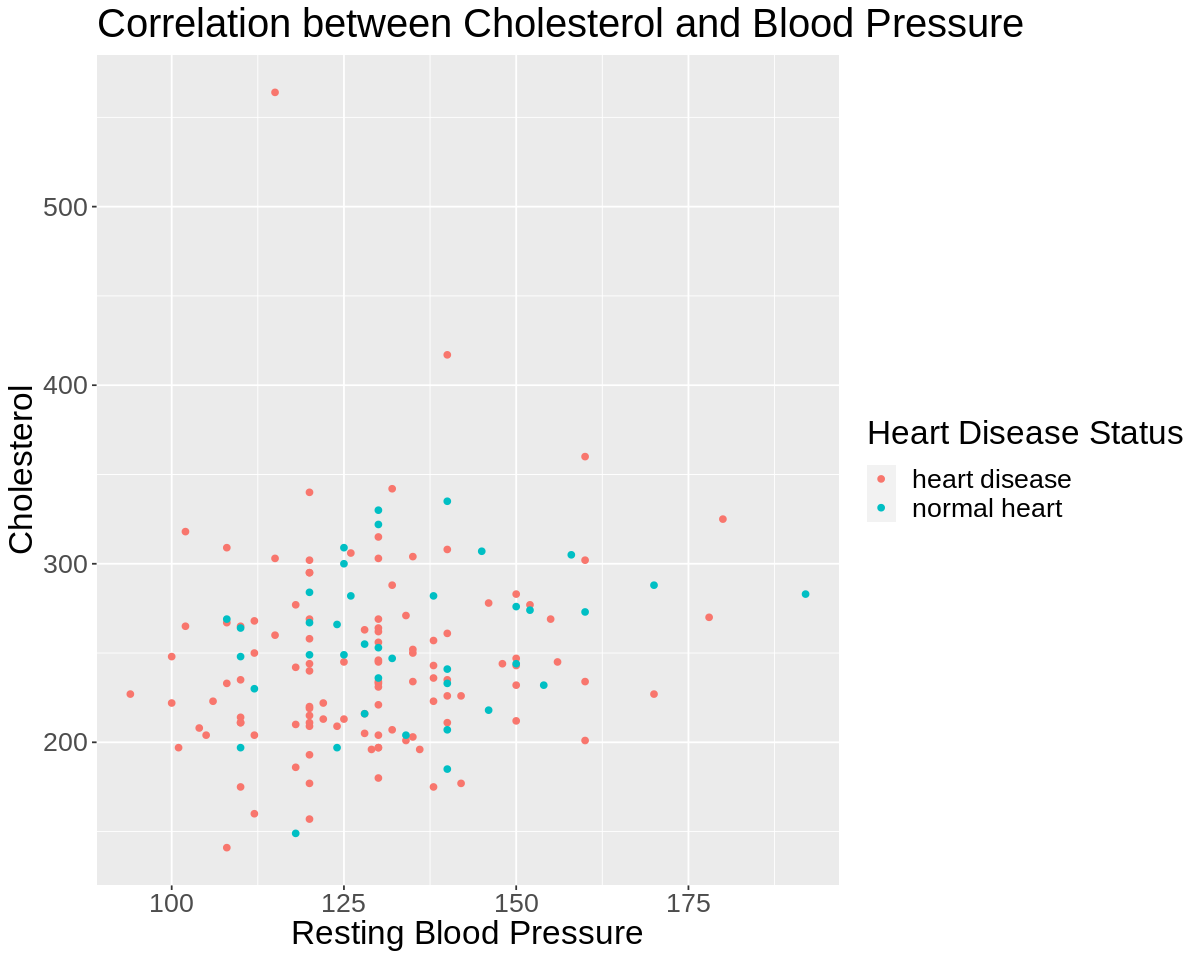

In [117]:
options(repr.plot.width = 10, repr.plot.height = 8) 
heart_disease_plot <- heart_disease_train |>
    ggplot(aes(x = resting_bp, y = cholesterol, colour = num)) + 
        geom_point()+ 
    labs(x = "Resting Blood Pressure", y = "Cholesterol", colour = "Heart Disease Status") +
    ggtitle("Correlation between Cholesterol and Blood Pressure") +
    theme(text = element_text(size = 20))
heart_disease_plot